# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
!pip install xgboost

#importing libraries
import pandas as pd # datasets in dataframes
import numpy as np # math operations on arrays

from sklearn import metrics # ML and statistical modeling (classification, regression, clustering, dimensionality reduction)
import matplotlib.pyplot as plt # create static, animated, and interactive visualizations
import seaborn as sns #make statistical graphs
import xgboost as xgb

from sklearn.model_selection import train_test_split # create training and testing subsets of  our data
from sklearn.model_selection import GridSearchCV #finds the optimal parameter values from a given set of parameters in a grid

from sklearn import metrics # to measure classification performance
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import BaggingRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.ensemble import StackingRegressor

# from sklearn.linear_model import LogisticRegression

#from xgboost import XGBRegressor
from xgboost import XGBClassifier


In [2]:
# Read Data and create a copy to prevent changes to original data
data = pd.read_csv('EasyVisa.csv')
df = data.copy()

## Data Overview

- Observations
- Sanity checks

In [3]:
# First 5 Rows
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
#Last 5 Rows
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [5]:
#Number of Rows and Columns
df.shape

(25480, 12)

- The data has 25,480 rows and 12 columns.

In [6]:
# The counts and types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


- No Null values in the dataset.

#### Convert object type to category type to save data space

In [7]:
# All of the columns with data type object
cols = df.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [8]:
# Converts object to category datatype to save data space
for i in cols.columns:
    df[i] = df[i].astype('category')

In [9]:
# The counts and types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


- Memory decreased from 2.3 MB to 2.0 MB

In [10]:
# Shows stats of quantitative columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


- Hmmm...a negative number of employees?

In [11]:
# Shows number of unique values for each column
df.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

In [12]:
# Shows counts for each unique value in the following categorical columns
cat_cols = ['continent','education_of_employee','has_job_experience','requires_job_training','region_of_employment','unit_of_wage','full_time_position','case_status']

for column in cat_cols:
    print(df[column].value_counts())
    print('-'*45)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
---------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
---------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
---------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
---------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
---------------------------------------------
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
---------------------------------------------
Y    22773
N     2707
Name: full_time_position, dtype: int64
--------------------

(array([208., 460., 237., 229., 209., 211., 184., 170., 140., 109.]),
 array([  2.1367 , 101.91498, 201.69326, 301.47154, 401.24982, 501.0281 ,
        600.80638, 700.58466, 800.36294, 900.14122, 999.9195 ]),
 <BarContainer object of 10 artists>)

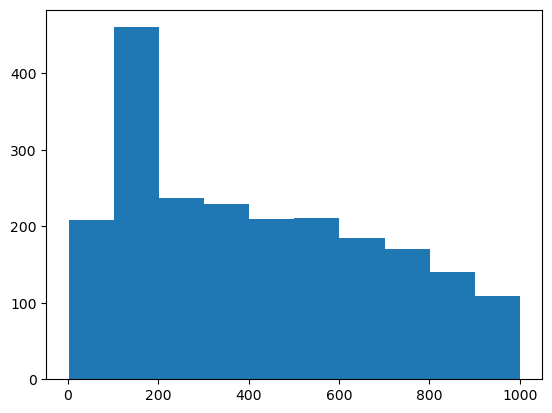

In [13]:
#Something looks weird with hours

df_hrs = data[data.unit_of_wage == 'Hour']
plt.hist(df_hrs.prevailing_wage)

- I'm not sure what is going on with the Hourly prevailing wages. They all seem much too high. 
- However, based off of this histogram, these values seem to be based of the same units whatever those are.
- I am going to just run with these values as they are. We'll see what it looks like in the analyses. 

In [14]:
#drop case_id since that will not help with analyses.
df.drop(['case_id'],axis=1,inplace=True)
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [20]:
# A function to quickly create a stacked histogram and box plot
def hist_and_box(data, feature, figsize=(15,10), kde=False, bins=None, logscale=False):
    '''
    Creates a Boxplot and a histogram using the below as arguments
    data: dataframe
    feature: column from the dataframe to be graphed
    figsize: size of the figure set to a default of (15,10)
    kde: density curve defaulted to False
    bins: number of bins for histo defaulted to none
    '''
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (1, 3)},
        figsize=figsize,
    )  # creates two subplots that share the same x-axis
    sns.boxplot(
        data=data, x=feature, ax=ax_box, meanline=True, showmeans=True, meanprops = dict(linestyle='--', color='orange'), color='cornflowerblue'
    )  # boxplot will be created and a orange dashed line will indicate the mean
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist
    )  # For histogram, lets you set the number of bins if defined in the arguments
    ax_hist.axvline(
        data[feature].mean(), color="orange", linestyle="--"
    )  # Add mean to the histogram as an orange dashed line
    ax_hist.axvline(
        data[feature].median(), color="dimgrey", linestyle="-"
    )  # Add median to the histogram as a dim grey line
    if logscale == True:
        plt.xscale('log')

In [21]:
# a function to quickly create a barplot with labels
def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [22]:
# A function to quickly create barplots that show proportions via stacked bars
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

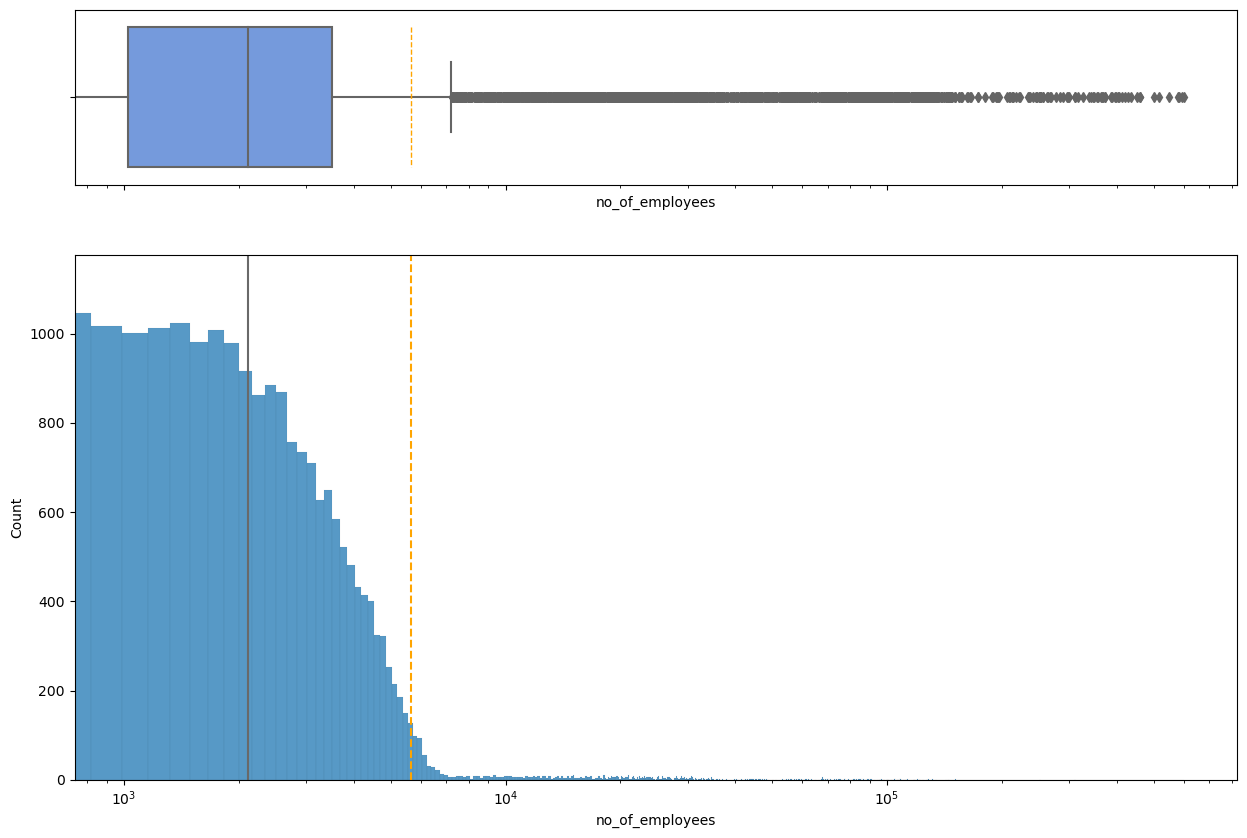

In [23]:
# The distribution for the sizes of employers
hist_and_box(df,'no_of_employees',logscale=True)

- Most employers are quite small with less than 2109 employees.
- However, there are a few very large employers

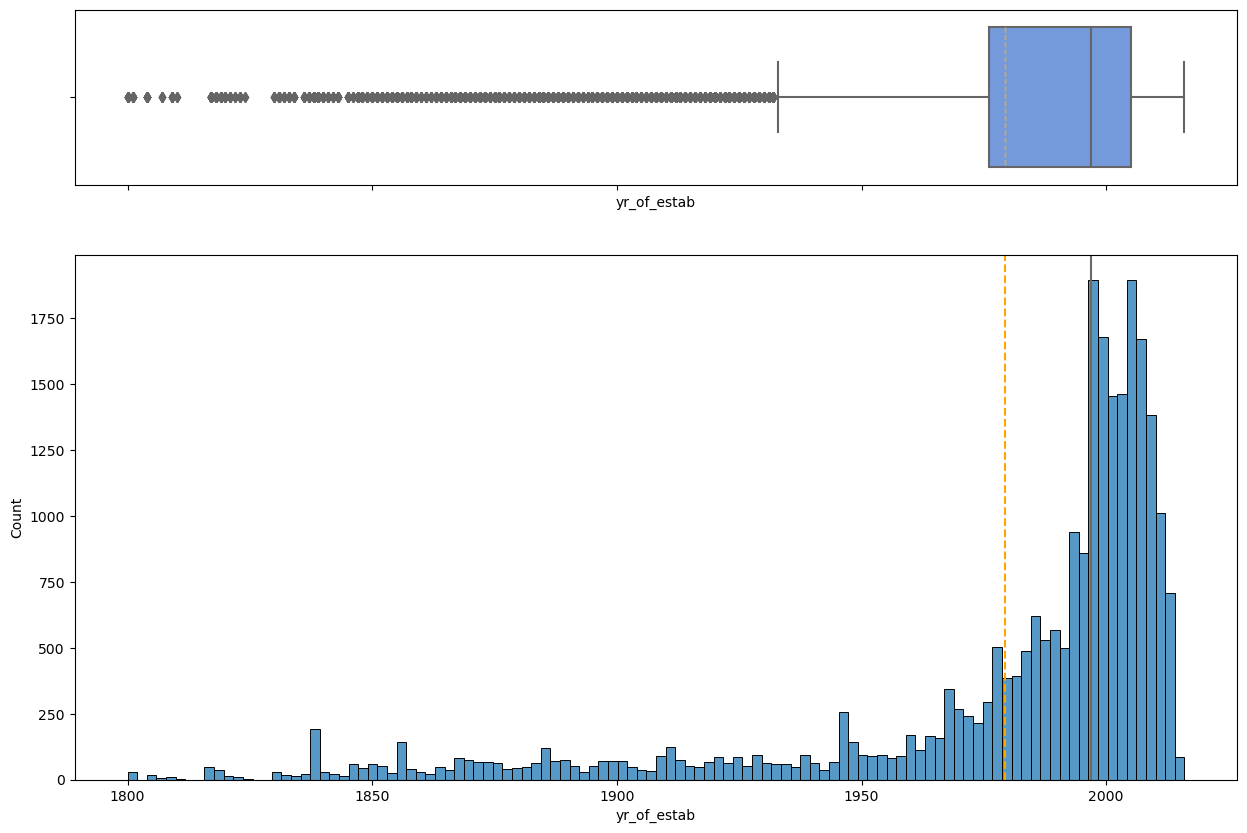

In [24]:
# The distribution of employers by their year of establishment
hist_and_box(df,'yr_of_estab')

- Most employers are relatively new having been established after the year 1997. 

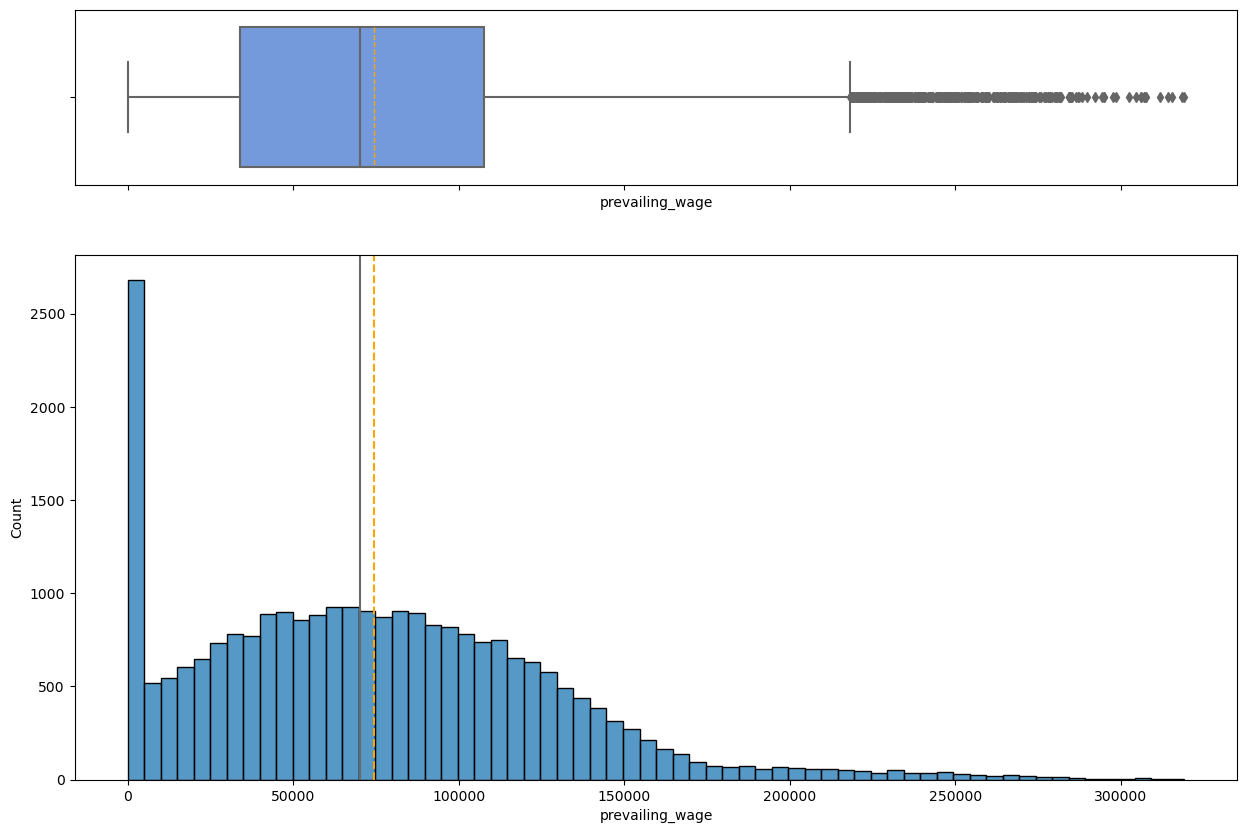

In [25]:
# The distribution of applicants by the prevailing wages in their industry
hist_and_box(df,'prevailing_wage')

- the first bar, representing wages from 0 to 5000, is so large probably because the prevailing_wages column list wages that are hourly, weekly, and monthly, as well as yearly. 

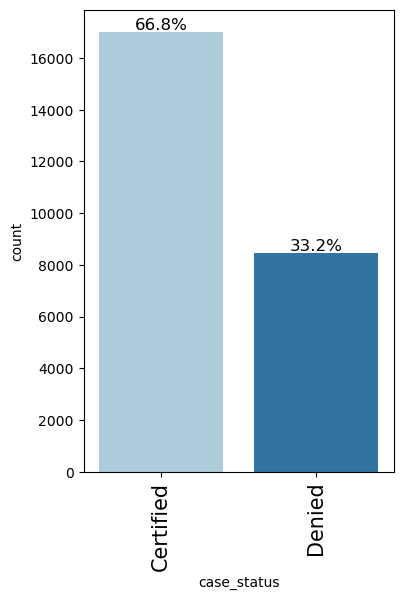

In [26]:
# This show the relative frequencies of certified(1) and denied(0) visas
labeled_barplot(df,'case_status')

- Applicants are certified at more than twice the rate at which they are denied.
- This may aindicate a need to stratify our samples to ensure that relative frequencies are preserved in the training and test sets.

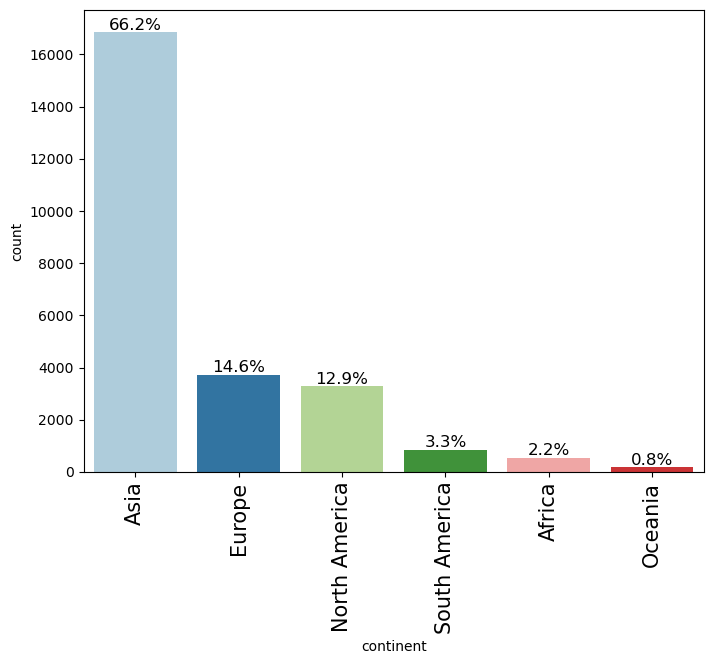

In [27]:
# The proportion of applicants from each continent
labeled_barplot(df,'continent')

- A lot of Asia
- This is probably more representative of the world population as a whole

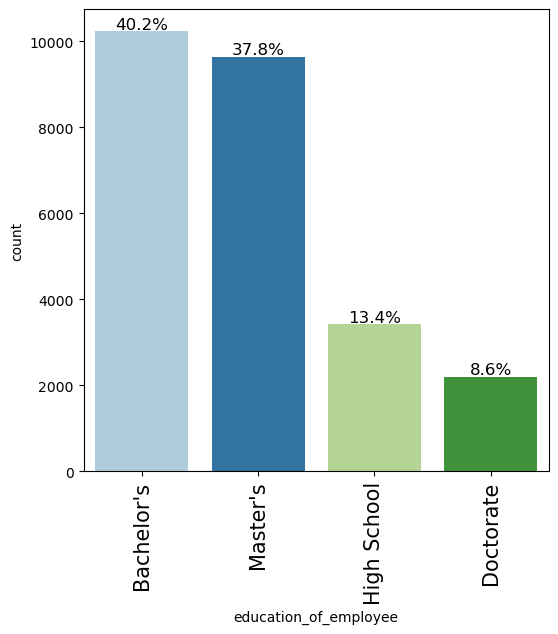

In [28]:
# The proportion of applicants at each education level
labeled_barplot(df,'education_of_employee')

- most applicants have only a bachelor's degree

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


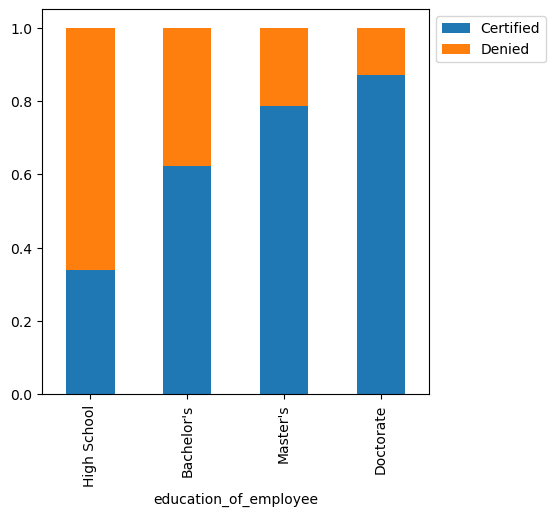

In [29]:
# Show the proportion of certified and denied visas for each education level
stacked_barplot(df,'education_of_employee','case_status')

- Higher education levels seem to correspond to higher proportions of certifications

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


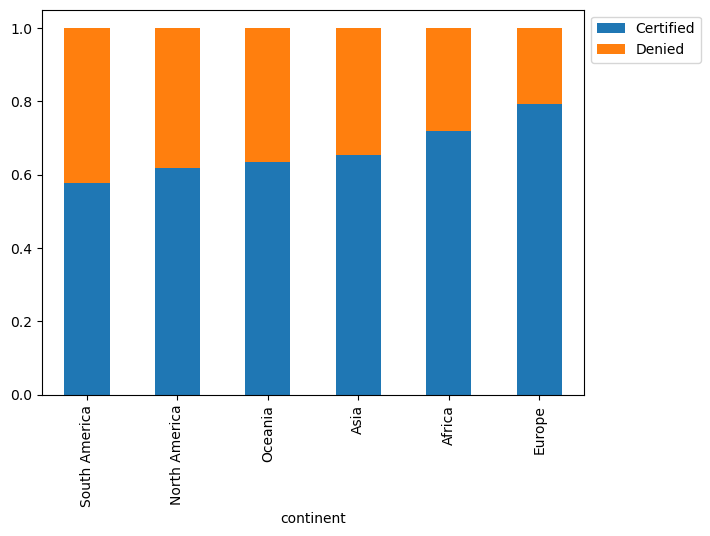

In [30]:
# Show the proportion of certified and denied visas by continent
stacked_barplot(df,'continent','case_status')

- The proportion of certified is highest for Africa and Europe.
- The proportion of certified is lowest for the Americas.

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


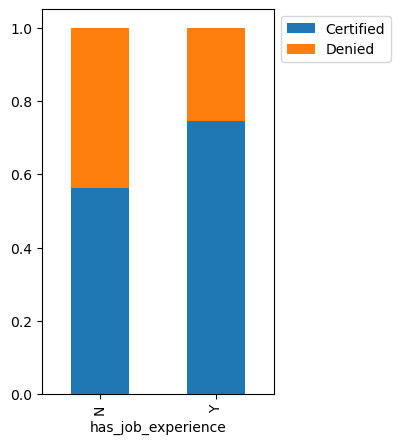

In [31]:
# Show the proportion of certified and denied visas by job experience
stacked_barplot(df,'has_job_experience','case_status')

- Those with work experience do have a higher certification rate.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


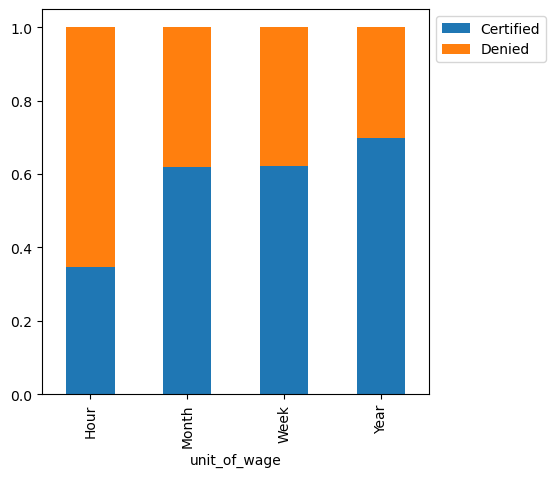

In [32]:
# Show the proportion of certified and denied visas by unit of prevailing wage in the applicants industry
stacked_barplot(df,'unit_of_wage','case_status')

- Salaried employess are most likely to be certified for visas. 

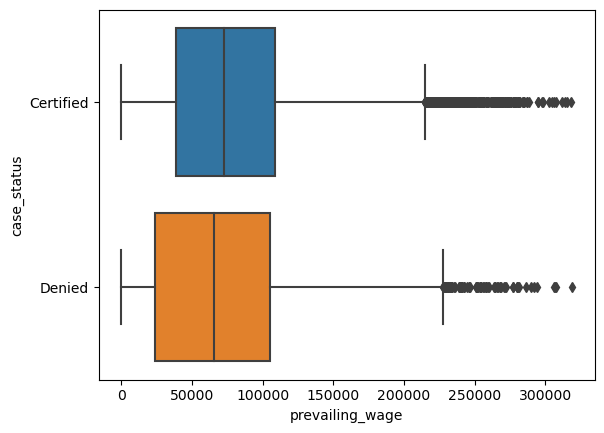

In [33]:
# A box plot disctribution comparing the prevailing wages of certified and denied visas
sns.boxplot(data=df,x='prevailing_wage', y='case_status')
plt.show()

- The prevailing wage is slightly but not much higher for certified applicants.

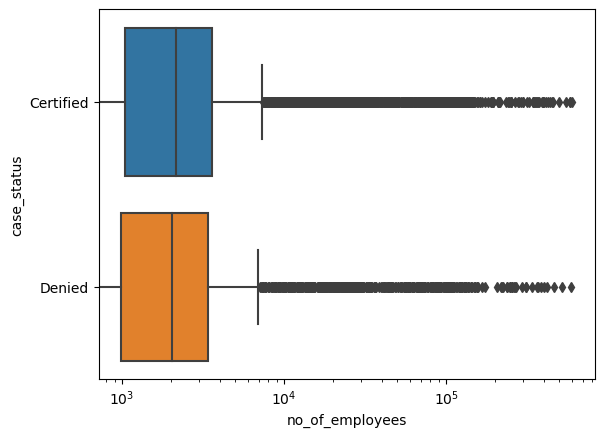

In [34]:
# A box plot disctribution comparing the number of employees of certified and denied visas
sns.boxplot(data=df,x='no_of_employees', y='case_status')
plt.xscale('log')
plt.show()

- Certified visas tend to come from companies with a larger number of employees

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [35]:
# Checking for Null values
df.isna().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

- There are no null values in the dataset

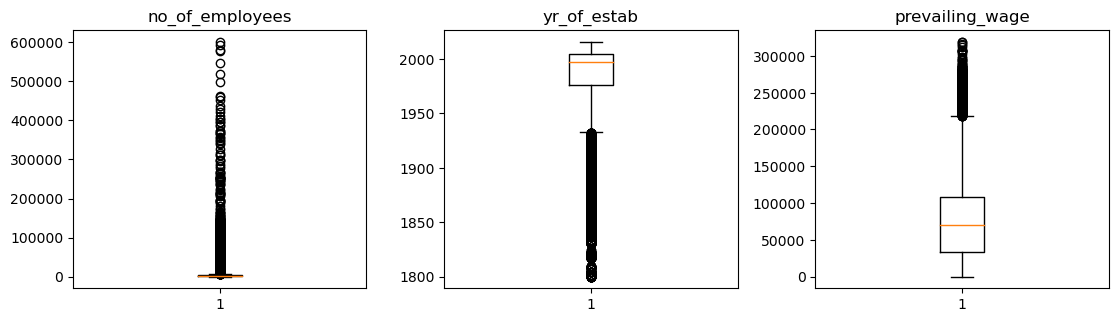

In [36]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are a large number of ouliers, but we will accept them as proper data values

#### Data Preparation for Model Building

In [37]:
# Changes the case stutus column to 1 for certified and 0 for denied
df['case_status'] = df['case_status'].apply(lambda x : 1 if x == 'Certified' else 0)

# Creates dataframes for the independent variables and the target variable
X = df.drop(['case_status'], axis=1)
y = df['case_status']

# Creates dummy variables for the categorical features
X = pd.get_dummies(X,drop_first=True)

In [38]:
X.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,...,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,2007,592.2029,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,2412,2002,83425.6500,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
2,44444,2008,122996.8600,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
3,98,1897,83434.0300,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,1082,2005,149907.3900,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1


In [39]:
# Createing the Training and Test Sets
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(17836, 21) (7644, 21)


In [40]:
# Checking the propoortion of certified and denied visas in the target variable dataframe
y.value_counts(1)

1    0.667896
0    0.332104
Name: case_status, dtype: float64

In [41]:
# Checking the propoortion of certified and denied visas in the test set
y_test.value_counts(1)

1    0.667844
0    0.332156
Name: case_status, dtype: float64

- The training set has 17,836 observations.
- The test set has 7,644 observations, and this is indeed 30% of the total observations.
- The training and test sets have roughly equal proportions of certified applicants

# EDA

- It is a good idea to explore the data once again after manipulating it.

In [42]:
# Creates a function to get the scores(accuracy, recall, precision) of a model for both the training and test sets.
# Will print those scores if flag=True

def get_metric_score(model, flag=True):
    
    score_list = []
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list 
    

In [43]:
#Creates a confucion matrix for the model

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Building bagging and boosting models

Model can make wrong predictions as:
1. Predicting a visa will be certified when it is denied.
2. Predicting a visa will be denied when it is certified. 

Which case is more important?
 - Predicting a Visa will get denied when it should be certified can cause us to miss out on a highly-qualified worker.

We should focus on imporoving the recall of our model. 

### Decision Tree Model

In [44]:
# Defines the Decision Tree Classifier with weights 33% on Denied and 67% on Certified
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.33,1:0.67},random_state=1)

In [45]:
# Fits the Model of the Decision Tree Classifier
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, random_state=1)

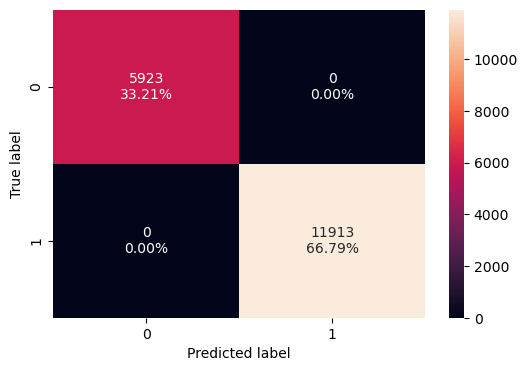

In [46]:
# Create a Confusion Matrix for the model of our Decision Tree Classifier on the training Set
confusion_matrix_sklearn(dtree, X_train, y_train)

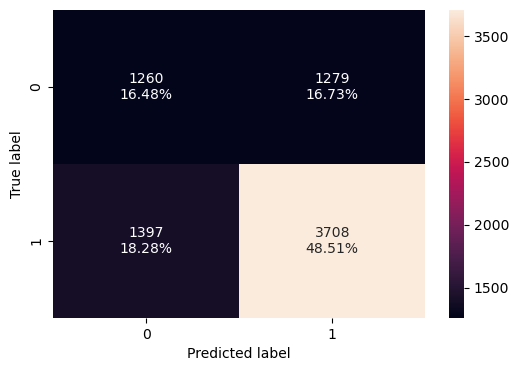

In [47]:
# Create a Confusion Matrix for the model of our Decision Tree Classifier on the test Set
confusion_matrix_sklearn(dtree, X_test, y_test)

In [48]:
# Gets the scores for our Decision Tree Model
dtree_score = get_metric_score(dtree, flag=True)

Accuracy on training set :  1.0
Accuracy on test set :  0.6499215070643642
Recall on training set :  1.0
Recall on test set :  0.7263467189030363
Precision on training set :  1.0
Precision on test set :  0.7435331862843393


- Model is very overfitting the training set.

### Bagging Classifier

In [49]:
# Defines the Bagging Classifier and create a fit model
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

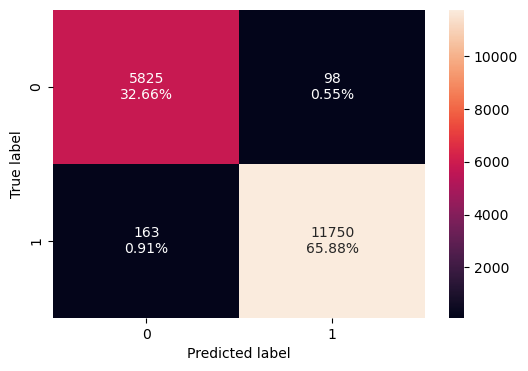

In [50]:
confusion_matrix_sklearn(bagging, X_train, y_train)

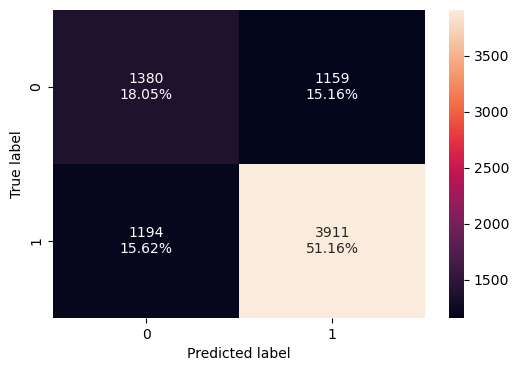

In [51]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [52]:
bagging_score = get_metric_score(bagging, flag=True)

Accuracy on training set :  0.9853666741421844
Accuracy on test set :  0.6921768707482994
Recall on training set :  0.9863174683119281
Recall on test set :  0.7661116552399608
Precision on training set :  0.9917285617825793
Precision on test set :  0.7714003944773176


- Definitely overfitting on the training set, but an improvement over the decision tree model above.

### Bagging Classifier with Weighted Decision Tree

In [53]:
# Defines the Bagging Classifier with weights 33% on Denied and 67% on Certified and create a fit model
bagging_wt = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.33,1:0.67},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight={0: 0.33,
                                                                 1: 0.67},
                                                   random_state=1),
                  random_state=1)

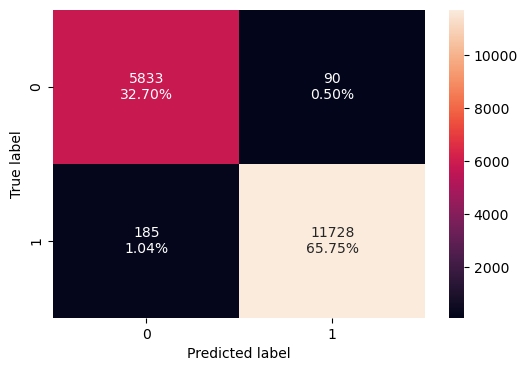

In [54]:
confusion_matrix_sklearn(bagging_wt,X_train,y_train)

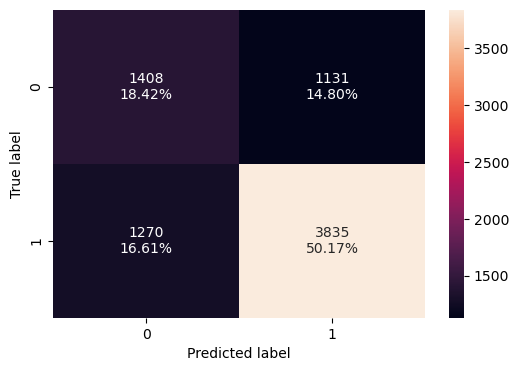

In [55]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [56]:
bagging_wt_score = get_metric_score(bagging_wt, flag=True)

Accuracy on training set :  0.9845817447858264
Accuracy on test set :  0.6858974358974359
Recall on training set :  0.9844707462435994
Recall on test set :  0.7512242899118511
Precision on training set :  0.9923844982230496
Precision on test set :  0.7722513089005235


- Model is overfitting the training set. 
- Weighted decision tree did not improve on the unweighted decision tree classifier based on recall.

### Random Forest

In [57]:
# Defines the Random Forest Classifier and creates a fit model
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

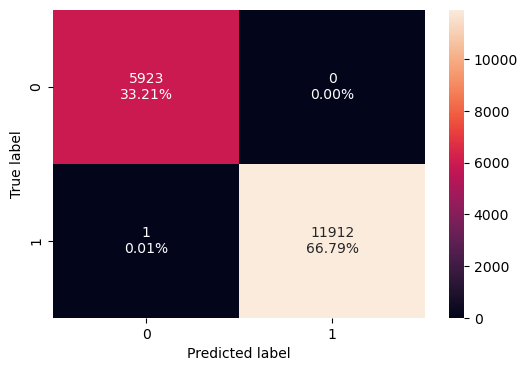

In [58]:
confusion_matrix_sklearn(rf,X_train,y_train)

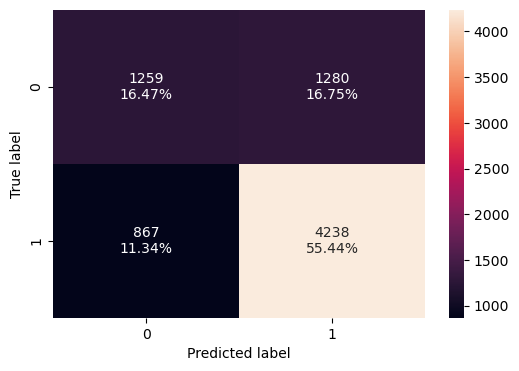

In [59]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [60]:
rf_score = get_metric_score(rf, flag=True)

Accuracy on training set :  0.999943933617403
Accuracy on test set :  0.7191261119832548
Recall on training set :  0.9999160580878033
Recall on test set :  0.8301665034280118
Precision on training set :  1.0
Precision on test set :  0.768031895614353


- Recall is still not great, but this is the best so far. 

### Random Forest with Class Weights

In [61]:
# Defines the Random Forest Classifier with weights 33% on Denied and 67% on Certified and creates a fit model
rf_wt = RandomForestClassifier(class_weight={0:0.33,1:0.67}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.33, 1: 0.67}, random_state=1)

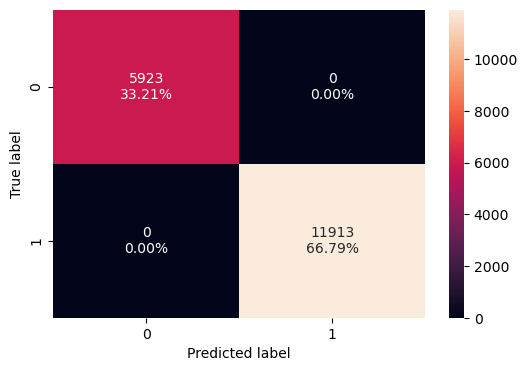

In [62]:
confusion_matrix_sklearn(rf_wt, X_train,y_train)

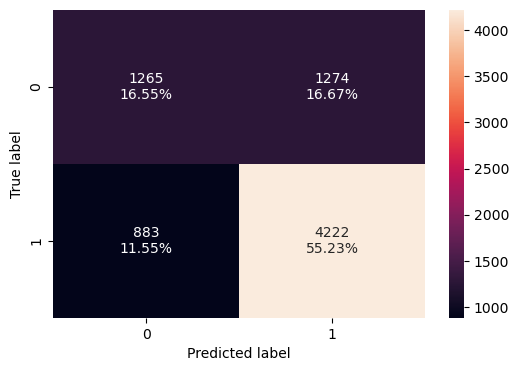

In [63]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [64]:
rf_wt_score = get_metric_score(rf_wt, flag=True)

Accuracy on training set :  1.0
Accuracy on test set :  0.7178178963893249
Recall on training set :  1.0
Recall on test set :  0.8270323212536729
Precision on training set :  1.0
Precision on test set :  0.7681950509461426


- No improvement over unweighted random forest. 

### AdaBoost Classifier

In [65]:
# Defines the Adaptive Boosting Classifier and creates a fit model
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

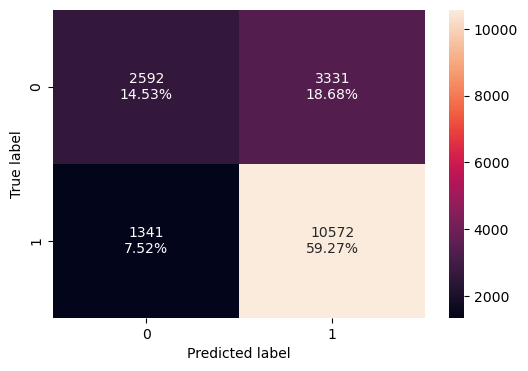

In [66]:
confusion_matrix_sklearn(abc, X_train,y_train)

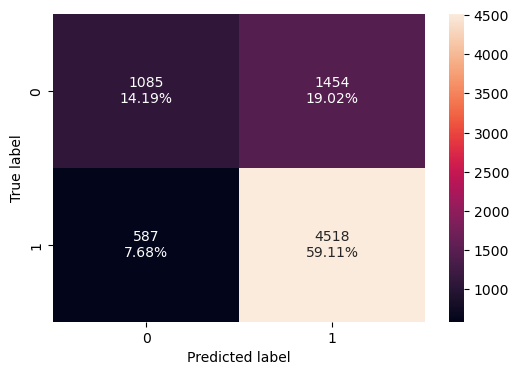

In [67]:
confusion_matrix_sklearn(abc, X_test,y_test)

In [68]:
abc_score = get_metric_score(abc, flag=True)

Accuracy on training set :  0.7380578605068401
Accuracy on test set :  0.7329931972789115
Recall on training set :  0.8874338957441451
Recall on test set :  0.8850146914789422
Precision on training set :  0.7604114219952528
Precision on test set :  0.7565304755525787


- The model created here does a good job of not overfitting on the training set. 
- However, the accuracy and recall scores are not as high as we would want them to be. 

### Gradient Boosting Classifier

In [69]:
# Defines the Gradient Boosting Classifier and creates a fit model
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

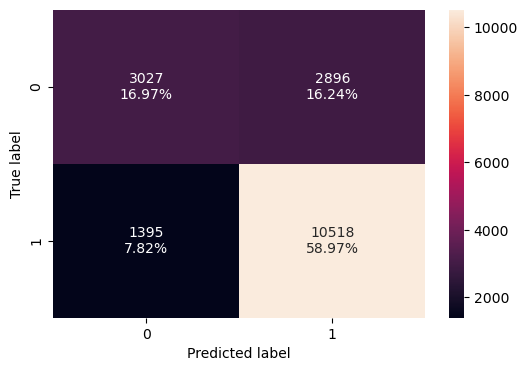

In [70]:
confusion_matrix_sklearn(gbc, X_train,y_train)

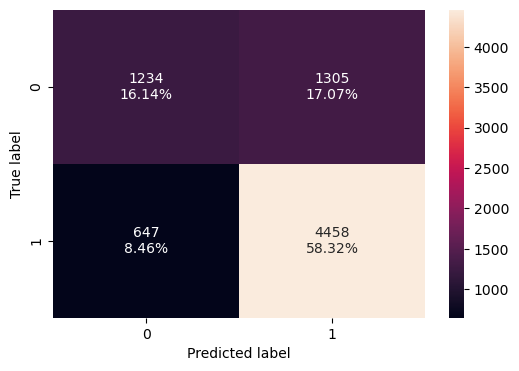

In [71]:
confusion_matrix_sklearn(gbc, X_test,y_test)

In [72]:
gbc_score = get_metric_score(gbc, flag=True)

Accuracy on training set :  0.7594191522762951
Accuracy on test set :  0.7446363160648874
Recall on training set :  0.88290103248552
Recall on test set :  0.8732615083251714
Precision on training set :  0.7841061577456389
Precision on test set :  0.773555439875065


- Recall and Accuracies are lower than the Adaptive Boost Model

### XGBoost Classifier

In [73]:
# Defines the Extreme Gradient Boosting Classifier and creates a fit model
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

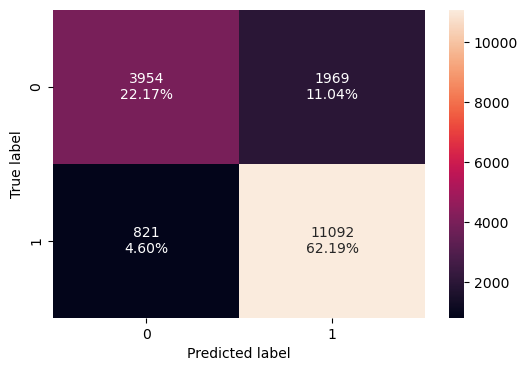

In [74]:
confusion_matrix_sklearn(xgb, X_train,y_train)

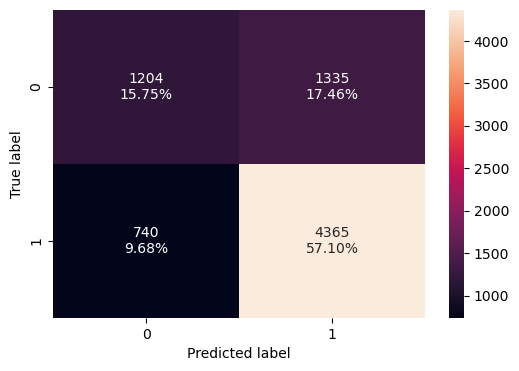

In [75]:
confusion_matrix_sklearn(xgb, X_test,y_test)

In [76]:
xgb_score = get_metric_score(xgb, flag=True)

Accuracy on training set :  0.8435747925543844
Accuracy on test set :  0.72854526425955
Recall on training set :  0.9310836900864602
Recall on test set :  0.8550440744368266
Precision on training set :  0.8492458464129852
Precision on test set :  0.7657894736842106


- Overfitting on the training set
- This model is further worse in both accuracy and recall

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

##  Will tuning the hyperparameters improve the model performance?

### AdaBoost Tuning

In [77]:
# Tuning the Adaptive Boost Model
abc_tuned = AdaBoostClassifier(random_state=1)

param_grid = {
    "n_estimators": np.arange(50,110,10),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(abc_tuned, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

abc_tuned = grid_obj.estimator

abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

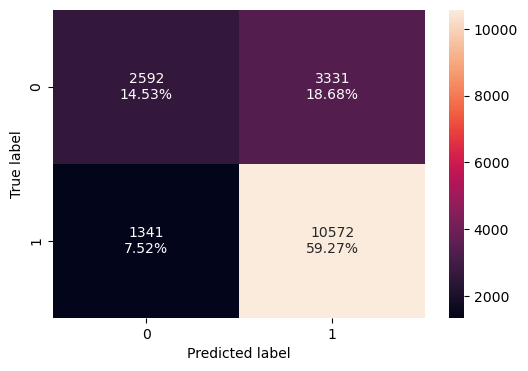

In [78]:
confusion_matrix_sklearn(abc_tuned, X_train,y_train)

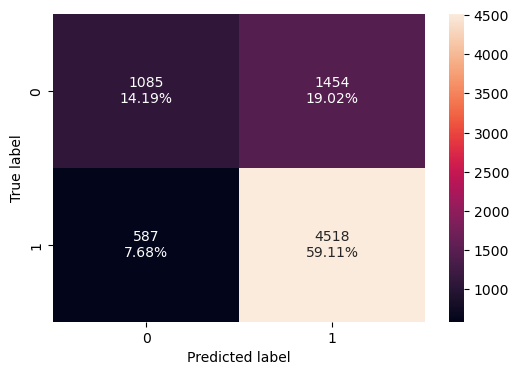

In [79]:
confusion_matrix_sklearn(abc_tuned, X_test,y_test)

In [80]:
abc_tuned_score = get_metric_score(abc_tuned, flag=True)

Accuracy on training set :  0.7380578605068401
Accuracy on test set :  0.7329931972789115
Recall on training set :  0.8874338957441451
Recall on test set :  0.8850146914789422
Precision on training set :  0.7604114219952528
Precision on test set :  0.7565304755525787


- Model does not appear to be overfitting since the score are roughly equal on both the training and test sets.
- Accuracy and Recall still have room for improvement.
- Appears to be identical to the defaul AdaBoost Model

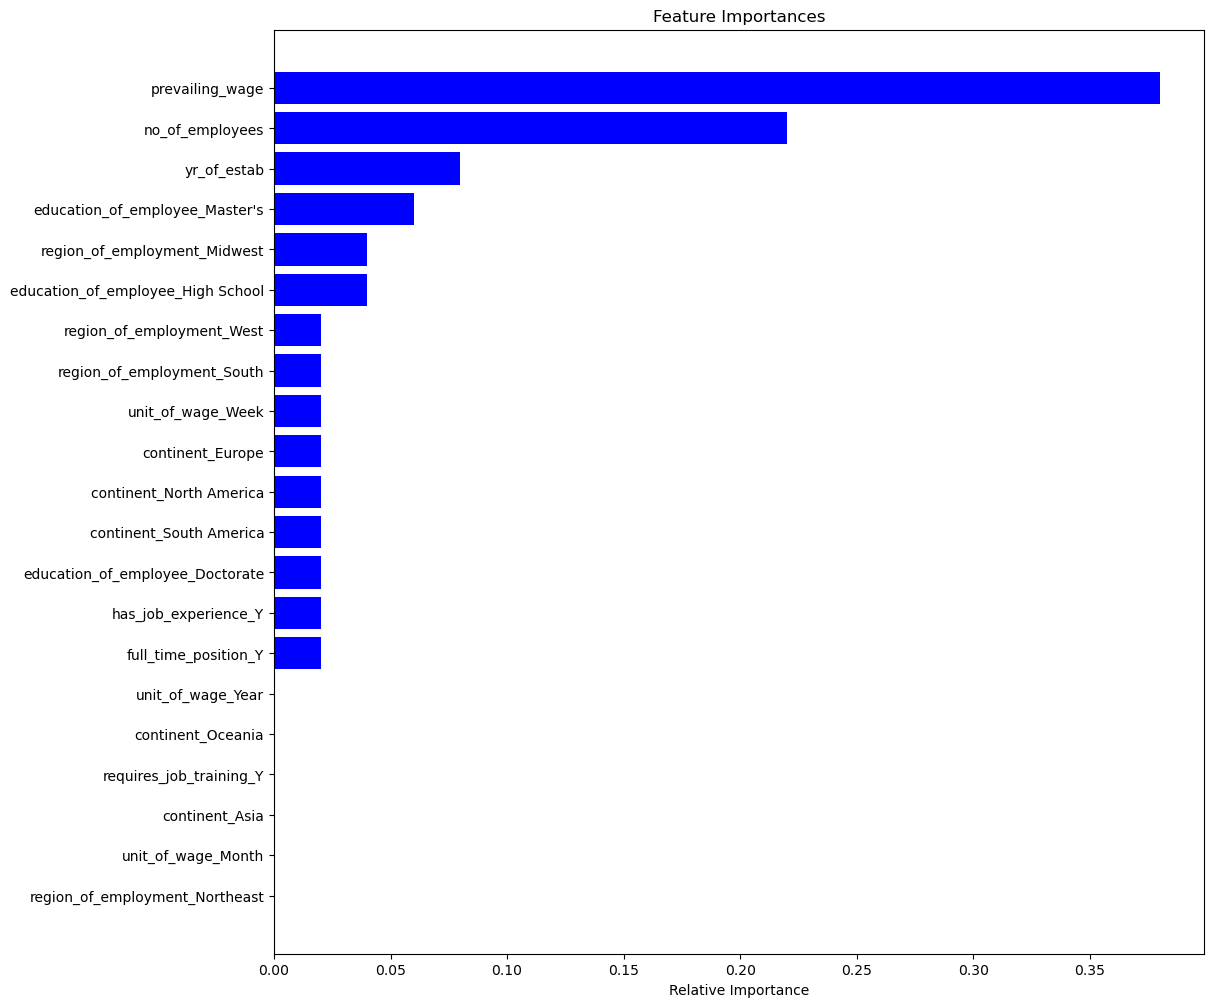

In [81]:
# Creates a bargraph comparing the importances of each of the features.
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Prevailing Wage as well as size and age of the company seem to be the most influential factors

### Gradient Boosting Tuning

In [82]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [83]:
gbc_init_score = get_metric_score(gbc_init, flag=True)

Accuracy on training set :  0.7584099573895492
Accuracy on test set :  0.7455520669806384
Recall on training set :  0.8824813229245362
Recall on test set :  0.875024485798237
Precision on training set :  0.7832662792430338
Precision on test set :  0.7736404572220298


In [84]:
# Tuning the Adaptive Boost Model
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(gbc_tuned, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.estimator

gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

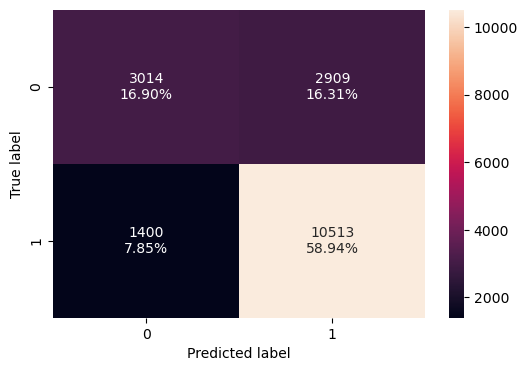

In [85]:
confusion_matrix_sklearn(gbc_tuned, X_train,y_train)

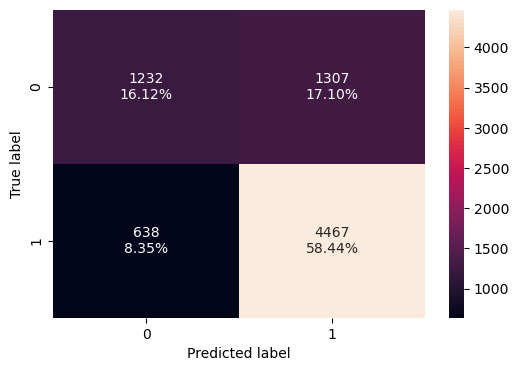

In [86]:
confusion_matrix_sklearn(gbc_tuned, X_test,y_test)

In [87]:
gbc_tuned_score = get_metric_score(gbc_tuned, flag=True)

Accuracy on training set :  0.7584099573895492
Accuracy on test set :  0.7455520669806384
Recall on training set :  0.8824813229245362
Recall on test set :  0.875024485798237
Precision on training set :  0.7832662792430338
Precision on test set :  0.7736404572220298


- Still upper 80s for recall mid 70s for accuracy.
- Still room for improvement

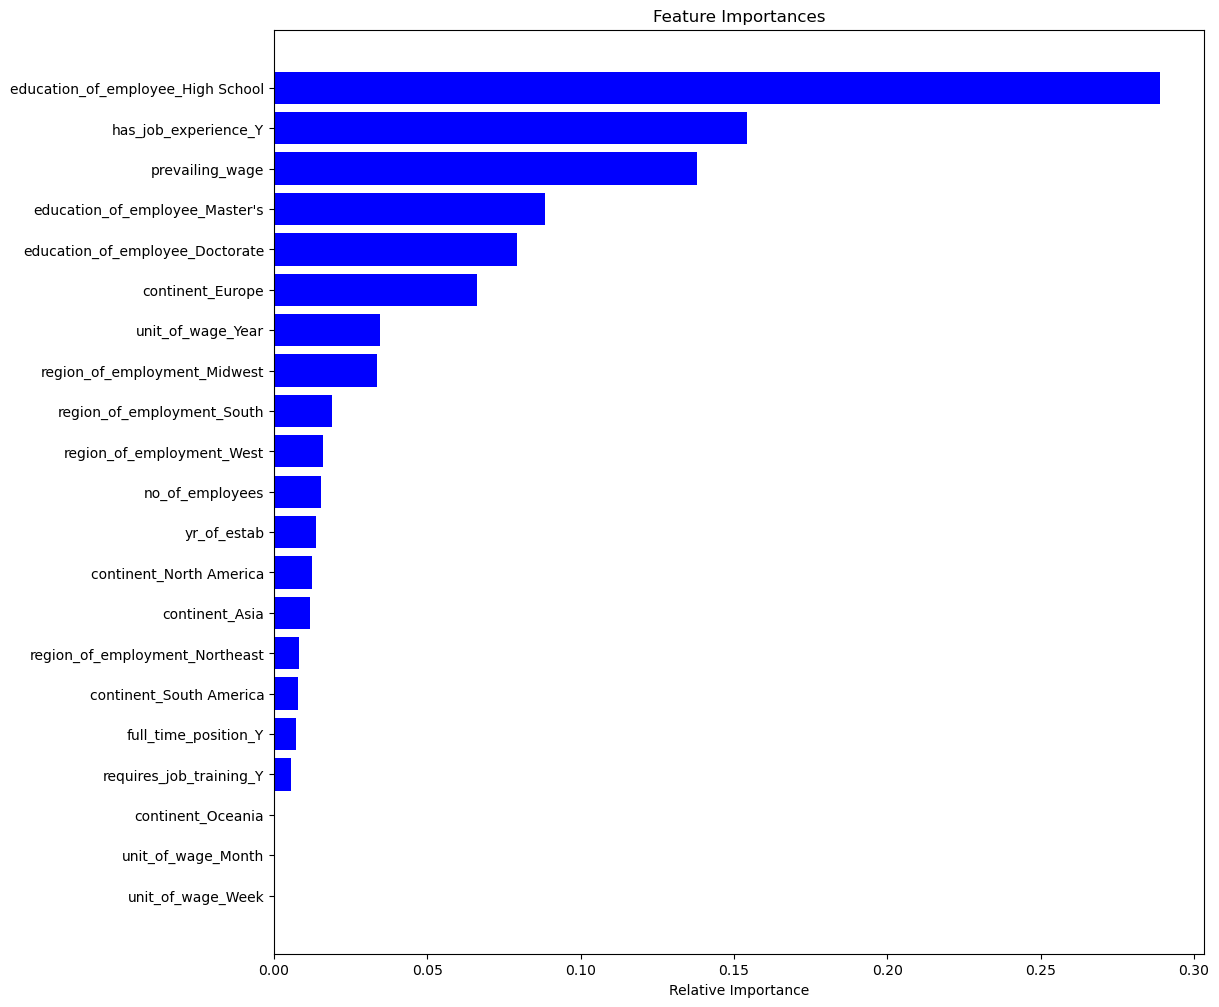

In [88]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- With this model a highscool education, job experience, and prevailing wage are the most important features.

### XGBoost Tuning

In [89]:
# Tuning the Extreme Gradient Boost Model
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(xgb_tuned, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

xgb_tuned = grid_obj.estimator

xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

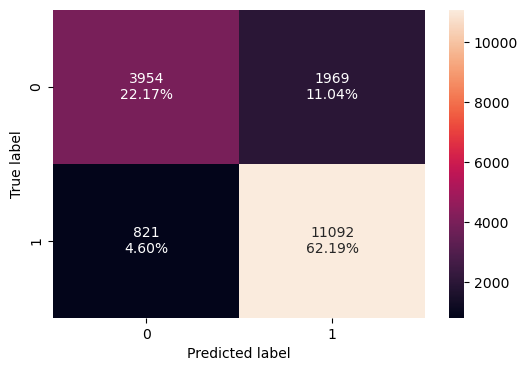

In [90]:
confusion_matrix_sklearn(xgb_tuned, X_train,y_train)

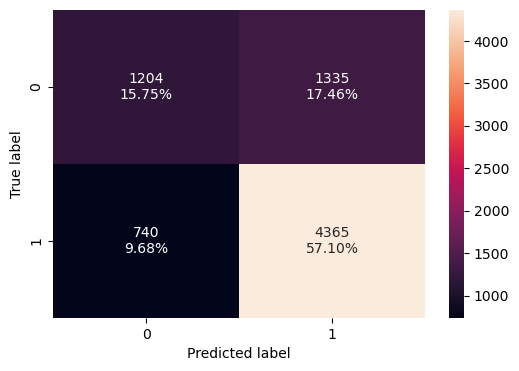

In [91]:
confusion_matrix_sklearn(xgb_tuned, X_test,y_test)

In [92]:
xgb_tuned_score = get_metric_score(xgb_tuned, flag=True)

Accuracy on training set :  0.8435747925543844
Accuracy on test set :  0.72854526425955
Recall on training set :  0.9310836900864602
Recall on test set :  0.8550440744368266
Precision on training set :  0.8492458464129852
Precision on test set :  0.7657894736842106


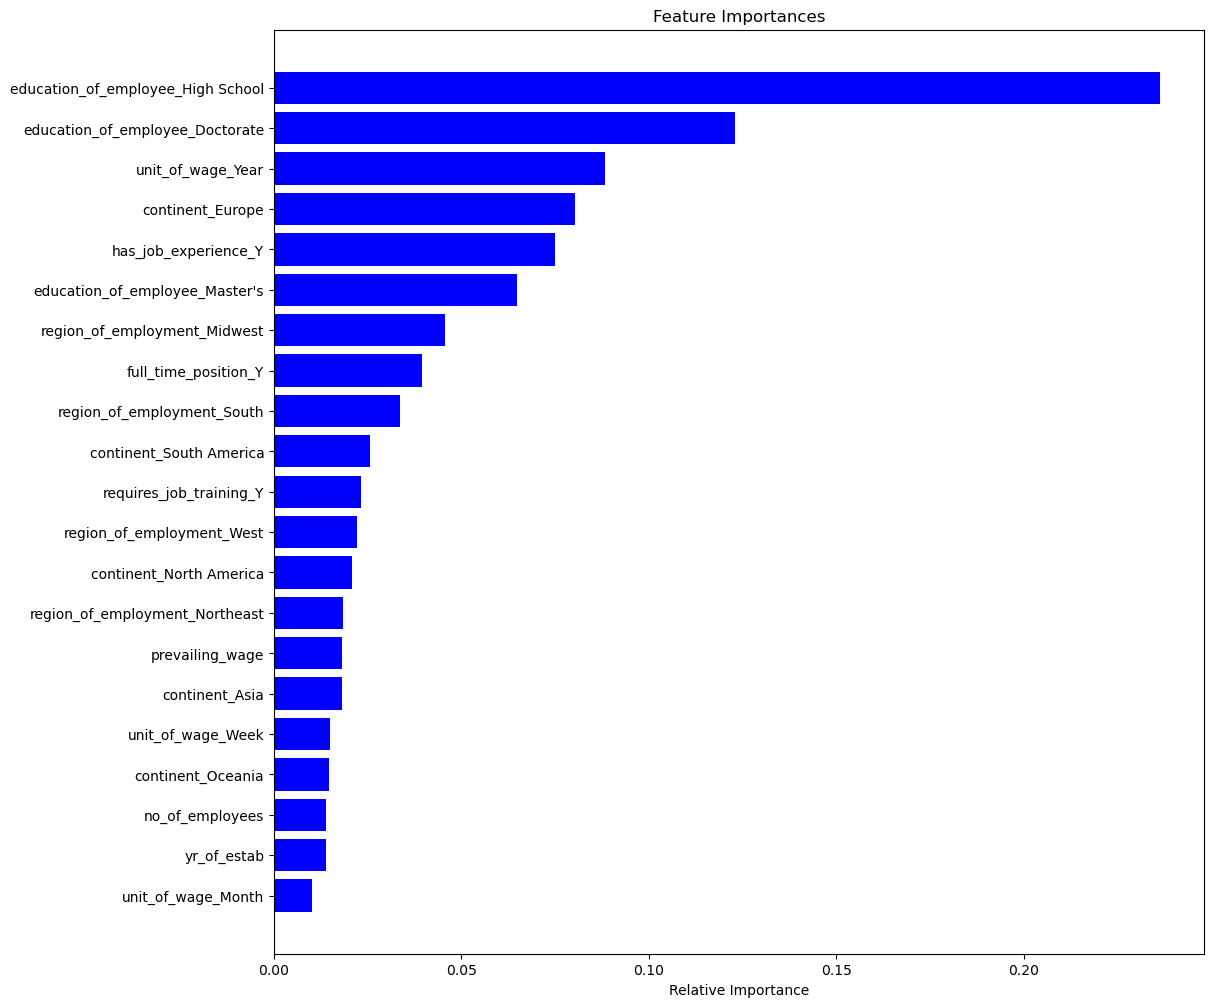

In [93]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- This time our top three features were: High School Education, Doctorate, and Units of Prevailing Wage in Years.

## Model Performance Comparison and Conclusions

In [94]:
#Creates a list of the scores of each of our models
models = [dtree, bagging, bagging_wt, rf, rf_wt, abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned]

acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

for model in models:
    j = get_metric_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [95]:
# Creates a table to be used for the comparing of all of our scores for all of our models, both test and training sets
comparison_frame = pd.DataFrame({'Model':['Decision Tree', 'Bagging', 'Bagging with Weights',
                                          'Random Forest', 'Random Forest with Weights',
                                          'AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test})
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.00,0.65,1.00,0.73,1.00,0.74
1,Bagging,0.99,0.69,0.99,0.77,0.99,0.77
2,Bagging with Weights,0.98,0.69,0.98,0.75,0.99,0.77
3,Random Forest,1.00,0.72,1.00,0.83,1.00,0.77
4,Random Forest with Weights,1.00,0.72,1.00,0.83,1.00,0.77
5,AdaBoost with default paramters,0.74,0.73,0.89,0.89,0.76,0.76
6,AdaBoost Tuned,0.74,0.73,0.89,0.89,0.76,0.76
7,Gradient Boosting with default parameters,0.76,0.74,0.88,0.87,0.78,0.77
8,Gradient Boosting with init=AdaBoost,0.76,0.75,0.88,0.88,0.78,0.77
9,Gradient Boosting Tuned,0.76,0.75,0.88,0.88,0.78,0.77


## Actionable Insights and Recommendations

- AdaBoost seems to have found the best model. It did not overfit the training set and had the highest recall.
- AdaBoost had an accuracy that was comparable to the best accuracies for all models on their test sets. 
- Precisions were comparable for all models. 
- The most influential predictor is the prevailing wage. 
- Other notable features include the number of employees and the year of establishment.

Recomendations
- We saw from our stacked boxplot that higher prevailing wages tend to correlate with certified visas. Since our best model shows that the prevailing wages feature has the highest importance, we can conclude that focus should be given to those applicants whose jobs are in industries with the highest prevailing wages.
- We saw from our stacked boxplot that larger employers tend to correlate with certified visas. Since our best model shows that the number of employees feature has a high importance, we can conclude that some focus should be given to those applicants whose jobs are with larger employers.